## Decision Support System (DSS) Span Analysis ##

https://github.com/jupyter/docker-stacks  
https://hub.docker.com/r/jupyter/r-notebook/tags/  

_(optional) docker pull jupyter/r-notebook:latest_  

We want to make the DDS Prototype ~/analysis/ directory to the Juypter container. Use the following to mount the analysis directory (i.e. current working directory) as a volume in the Juypter container. Note that the directory needed to be added via the Docker Desktop Dashboard on Mac.

_docker run -it --rm -d -p 10000:8888 -v ${PWD}:/home/jovyan/work --name notebook jupyter/r-notebook:latest_  

To find the token from the container:  
_docker exec -it notebook jupyter server list_

Navigate to the container UI and enter the token:
http://localhost:10000

In [1]:
install.packages("stringr")                # Install stringr package in R
library("stringr")                         # Load stringr package

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
setwd('/home/jovyan/work/data')

In [3]:
options(warn=-1)
spanData <- read.csv('DSS Span Data-data-2022-04-08 15_47_24.csv', header = TRUE)
attach(spanData)

# Exploratory Data Analysis #

In [4]:
head(spanData)

,Trace.ID,Trace.name,Start.time,Duration
,<chr>,<chr>,<chr>,<chr>
1,d036dfc6fef1bd91b2e3ecd741f421af,dss-prototype: /tracks,2022-04-08 19:35:20.546,13.7 ms
2,e59f4e0f2b3ad304bfaf3c2006318f42,dss-prototype: /tracks,2022-04-08 19:35:19.519,15.6 ms
3,dfdab2d9498f4733bc0aeba343bcfa00,dss-prototype: /tracks,2022-04-08 19:35:18.477,28.0 ms
4,3661c5545c07f352098efcfc9af5772e,dss-prototype: /tracks,2022-04-08 19:35:17.414,23.5 ms
5,8209cdcbd0665dc95e3d3a4f71818af6,dss-prototype: /tracks,2022-04-08 19:35:16.366,29.8 ms
6,479b8b28a4c033cbf1ce650364bc63c1,dss-prototype: /tracks,2022-04-08 19:35:15.343,11.2 ms


In [5]:
summary(spanData)

   Trace.ID          Trace.name         Start.time          Duration        
 Length:100         Length:100         Length:100         Length:100        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

In [6]:
# Convert character data into numeric metrics

spanMetrics <- spanData

for(i in 1:nrow(spanMetrics)) {       # for-loop over rows
    
    # Convert span duration
    
    char = spanMetrics[i,4]
    len = str_length(char)
    duration = str_sub(char,1,(len-3))
    units = str_sub(char,(len-2),len)
    duration = as.numeric(duration)

    if(units == ' ms') {
        duration = duration / 1000              # Convert to ms
    } else if (units == ' µs') {
        duration = duration / 1000000           # Convert to µs
    } else {
        print ('Unable to find specified units')
    }
    spanMetrics[i,4] = duration
    
    # Convert time

    time = spanMetrics[i,3]
    epoch <- as.POSIXct(time)
    epoch_int <- as.integer(epoch)
    spanMetrics[i,3] = epoch_int
}

# Convert columns for char to numeric

spanMetrics$Duration = as.numeric(spanMetrics$Duration)
spanMetrics$Start.time = as.numeric(spanMetrics$Start.time)

head(spanMetrics)
tail(spanMetrics)
summary(spanMetrics)

,Trace.ID,Trace.name,Start.time,Duration
,<chr>,<chr>,<dbl>,<dbl>
1,d036dfc6fef1bd91b2e3ecd741f421af,dss-prototype: /tracks,1649446520,0.0137
2,e59f4e0f2b3ad304bfaf3c2006318f42,dss-prototype: /tracks,1649446519,0.0156
3,dfdab2d9498f4733bc0aeba343bcfa00,dss-prototype: /tracks,1649446518,0.0280
4,3661c5545c07f352098efcfc9af5772e,dss-prototype: /tracks,1649446517,0.0235
5,8209cdcbd0665dc95e3d3a4f71818af6,dss-prototype: /tracks,1649446516,0.0298
6,479b8b28a4c033cbf1ce650364bc63c1,dss-prototype: /tracks,1649446515,0.0112


,Trace.ID,Trace.name,Start.time,Duration
,<chr>,<chr>,<dbl>,<dbl>
95,294ee9dc4875561fee99dadef067be9b,dss-prototype: /RIC,1649446414,0.3750
96,5e9c6090e8998e7a5e4b18ca0ff0f1d1,dss-prototype: /tracks,1649446413,0.0135
97,0a7ed38f92b97ad5687800c768e3f039,dss-prototype: /tracks,1649446412,0.0136
98,5b0ec8951447c56678d66475f5a98205,dss-prototype: /tracks,1649446411,0.0196
99,74f6017636090bfec52e74ab46a13ed2,dss-prototype: /tracks,1649446410,0.0191
100,e1bc41ad1aa94c7c80d49a612f185229,dss-prototype: /tracks,1649446409,0.0270


   Trace.ID          Trace.name          Start.time           Duration      
 Length:100         Length:100         Min.   :1.649e+09   Min.   :0.01050  
 Class :character   Class :character   1st Qu.:1.649e+09   1st Qu.:0.01550  
 Mode  :character   Mode  :character   Median :1.649e+09   Median :0.02155  
                                       Mean   :1.649e+09   Mean   :0.09738  
                                       3rd Qu.:1.649e+09   3rd Qu.:0.04088  
                                       Max.   :1.649e+09   Max.   :0.81200  

## Search for outliers

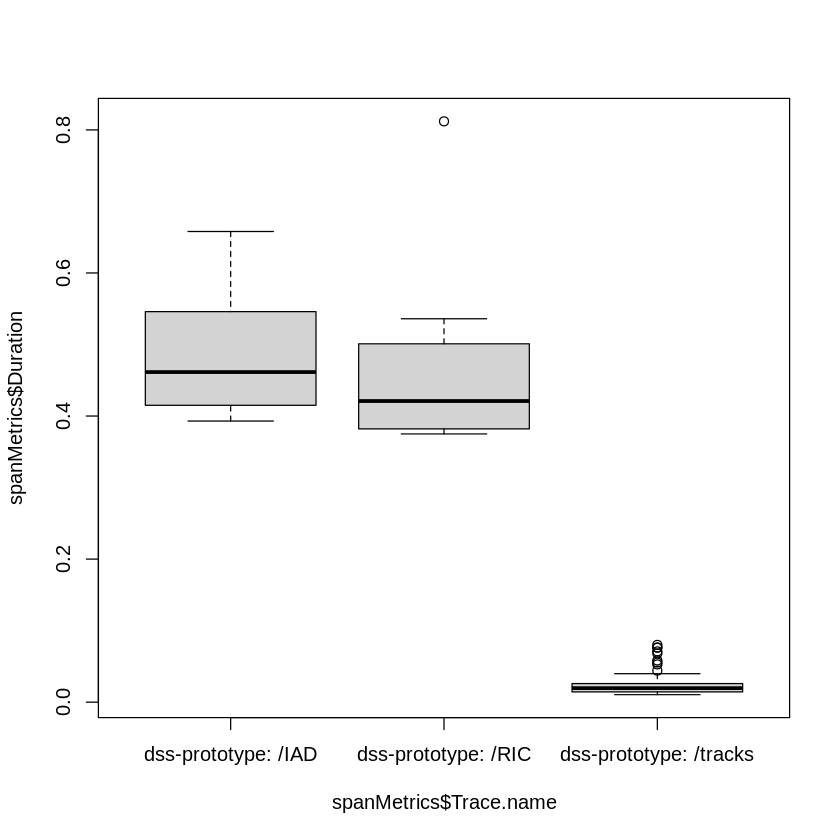

In [7]:
boxplot(spanMetrics$Duration~spanMetrics$Trace.name)

In [8]:
## Use this to get the values of the statistical outliers in trk_update_data from R
outliers <- boxplot(spanMetrics$Duration, plot = FALSE)$out
outliers
# spanMetrics$Duration[which(spanMetrics$Duration %in% outliers),]

[1] 0.422 0.387 0.658 0.377 0.453 0.412 0.408 0.466 0.470 0.430 0.483 0.812
[13] 0.393 0.536 0.609 0.375

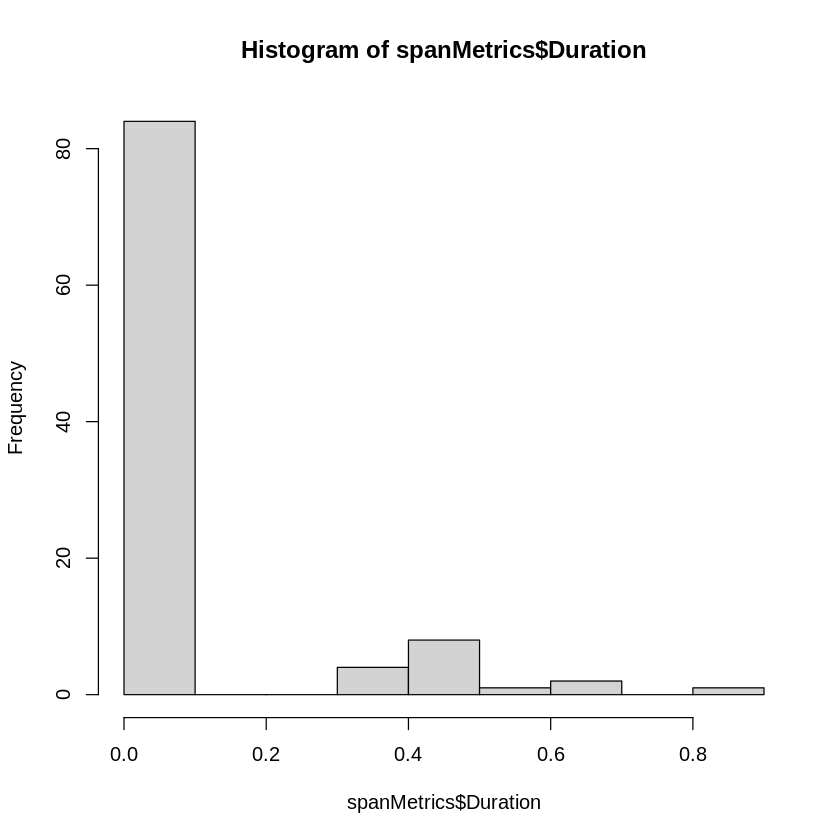

In [9]:
# par(mfrow=c(2,2))

hist(spanMetrics$Duration)

In [10]:
# plot(Duration~factor(Trace.name))

## Q-Q Plot

The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a normal or exponential. A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

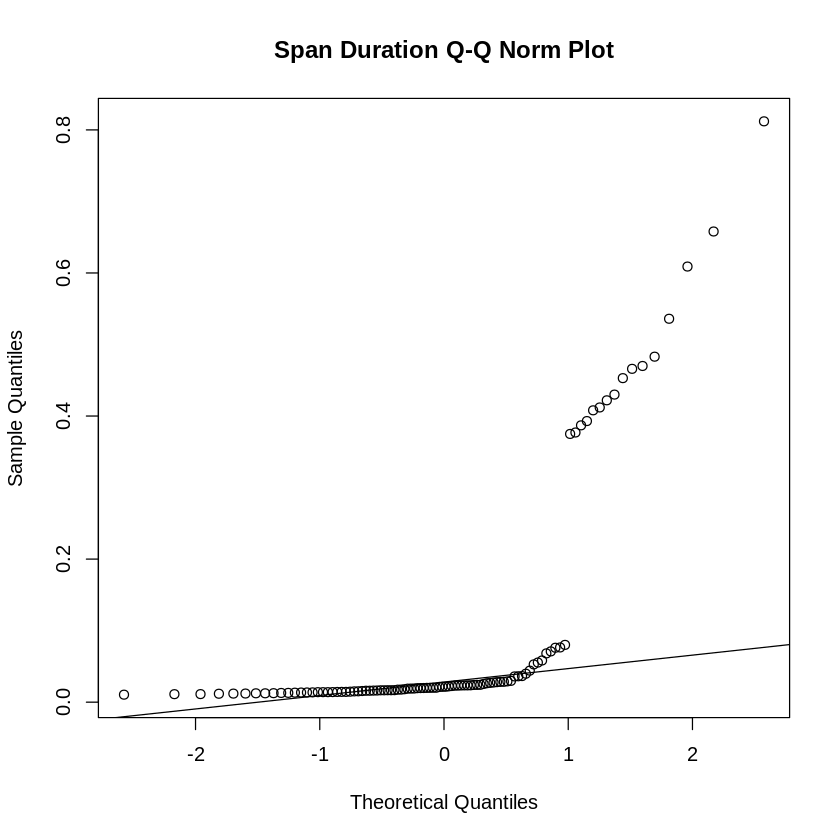

In [11]:
qqnorm(spanMetrics$Duration,main="Span Duration Q-Q Norm Plot")
qqline(spanMetrics$Duration)

## Autocorrelation ##

Autocorrelation plots are a commonly-used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

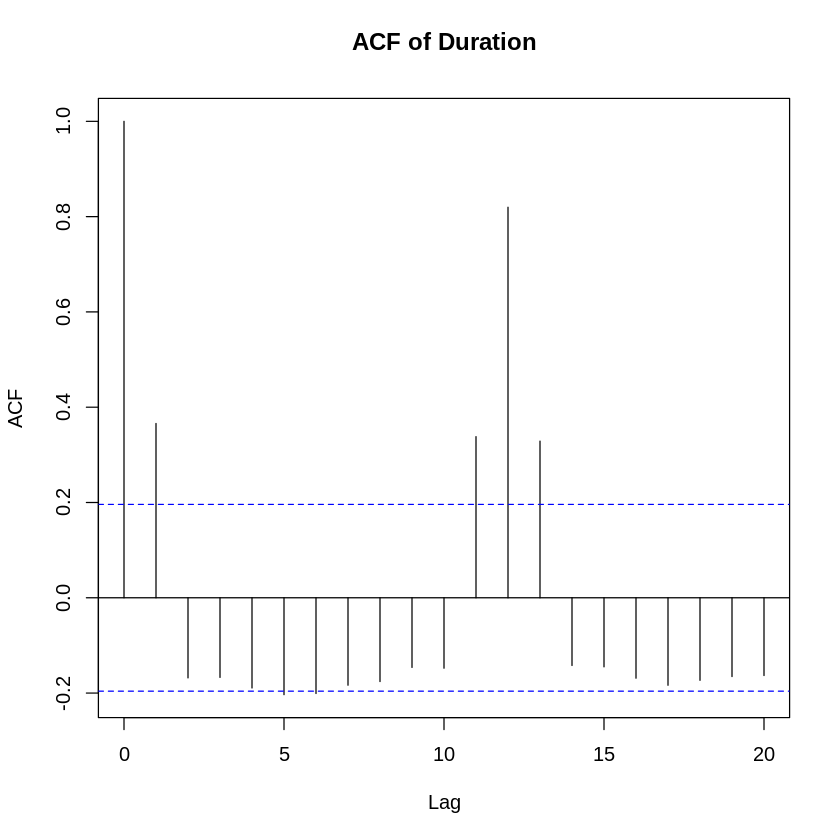

In [12]:
acf(spanMetrics$Duration, main="ACF of Duration")

# Hypothesis Testing # 

Modern DevSecOps architectures can be designed to meet hard-real-time latency (μ) requirements using modern computing environments and computing infrastructure:

H0: μ ≤ tbd ms with jitter within latency bounds  
Ha: μ > tbd ms with jitter exceeding latency bounds  
∝ = 0.05

We will use 500 ms; i.e. tbd will be set to 0.5.



## Shapiro test to establish normality

Null hypothesis: the data are normally distributed  
Alternative hypothesis: the data are not normally distributed

In [13]:
shapiro.test(spanMetrics$Duration)


	Shapiro-Wilk normality test

data:  spanMetrics$Duration
W = 0.53184, p-value = 2.587e-16


**REVIEW** p-value = 0.071 > 0.05; fail to reject the null hypothesis that the data is normally distributed.

## T-Test ##

In [14]:
x = spanMetrics$Duration
t.test(x=x, mu=0.5, alternative = 'greater')


	One Sample t-test

data:  x
t = -22.992, df = 99, p-value = 1
alternative hypothesis: true mean is greater than 0.5
95 percent confidence interval:
 0.06830602        Inf
sample estimates:
mean of x 
 0.097381 
